In [2]:
#initialisation (X) avoir les params W et b
#écrire algo itératif
##Modele(X,W,b)                          (Z=XW+b) (A=1/(1/exp(-Z)))
##Cost(A,Y)                              L= -1/m * sum (-y*log(A)+(1-y) * log(1-A))
##Gradients(A,X,y)                       dL/dW dL/db
##Update(W,b, dW,db) update de W et b    W=W-alpha*dL/dW   b=b-alpha*dL/db
#fin bouvle (on a minimisé le cout de notre modèle avec les nouveau W et b

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

(100, 1)
(100, 2)


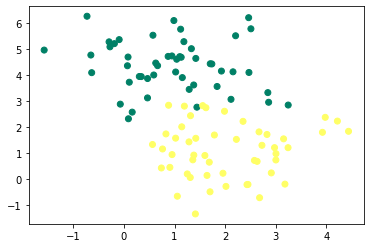

In [10]:
X,y= make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0],1))
print(y.shape)
print(X.shape)

plt.scatter(X[:,0], X[:,1] , c=y, cmap='summer')
plt.show()

In [11]:
#fonction d'initialisation
def initialisation(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return (W, b)

In [16]:
##test
#W,b = initialisation(X)
#W.shape
#b.shape
#b

In [17]:
def model(X, W,b):
        Z = X.dot(W) +b
        A = 1/(1 + np.exp(-Z))
        return A

In [18]:
A = model (X,W,b)
A.shape

(100, 1)

In [41]:
#foction cout
def log_loss(A, y):
    return 1/len(y) * np.sum(-y * np.log(A) - (1-y) * np.log(1-A))

In [42]:
##test
#log_loss(A, y)

In [43]:
def gradients(A,X,y):
    dW = 1/len(y) * np.dot(X.T, A-y)
    db = 1/len(y) * np.sum(A-y)
    return (dW, db)

In [44]:
##test
#dW,db = gradients(A,X,y)
#dW.shape
#db

In [45]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W,b)

In [46]:
##test
#update(dW, db, W,b , learning_rate=0.01)
#W.shape

In [61]:
###fonction de prédiction (Sigmoide ?)
def predict(X, W,b):
    A= model (X,W,b)
    print(A) #probabilité que l'exemple appartienne à la classe A
    return A>= 0.5 #lorsque le seuil est >=0.5 on retourne la valeur de la classe A

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
#####ALGORITHME
def artificial_neuron(X, y, learning_rate=0.1, n_iter= 100):
    #initialiser les params W et b
    W,b = initialisation (X)
    #pour visualiser l'évolution du cout => liste
    Loss = []
    ##début apprentissage##
    for i in range (n_iter):
        A = model(X,W,b)
        #Loss = log_loss(A, y)
        Loss.append(log_loss(A,y))
        dW, db = gradients(A,X,y)
        W , b = update (dW, db, W, b, learning_rate)
    ##apprentissage fini##
    #calcul prediction pour toutes les données du Dataset
    y_pred = predict(X,W, b)
    #performance du modèle : (accuracy)
    print(accuracy_score(y,y_pred))
    plt.plot(Loss)
    plt.show()
    return (W,b) #à sauvegarder si on ne veut pas réentrainer le modèle

[[0.96569213]
 [0.68039625]
 [0.00760221]
 [0.12525156]
 [0.95354249]
 [0.34596678]
 [0.08526061]
 [0.94814108]
 [0.05649954]
 [0.80442655]
 [0.04007261]
 [0.82610018]
 [0.03880108]
 [0.02215555]
 [0.67990644]
 [0.98139011]
 [0.98514376]
 [0.04215843]
 [0.6375433 ]
 [0.58825127]
 [0.06057827]
 [0.04561991]
 [0.37676841]
 [0.00760232]
 [0.93223598]
 [0.04329299]
 [0.83349015]
 [0.0150236 ]
 [0.08805349]
 [0.73059544]
 [0.96327658]
 [0.05814187]
 [0.59179151]
 [0.96394243]
 [0.40276611]
 [0.27839808]
 [0.71732019]
 [0.54730663]
 [0.48550398]
 [0.38641599]
 [0.06611692]
 [0.12105318]
 [0.00151204]
 [0.18565364]
 [0.19657501]
 [0.81009521]
 [0.94293616]
 [0.9304469 ]
 [0.00627191]
 [0.01477688]
 [0.90710024]
 [0.48542957]
 [0.08163991]
 [0.05832998]
 [0.82665521]
 [0.0574345 ]
 [0.7270665 ]
 [0.77199696]
 [0.9360493 ]
 [0.98253796]
 [0.59936816]
 [0.21994017]
 [0.00746336]
 [0.90813648]
 [0.02370544]
 [0.3670304 ]
 [0.04004817]
 [0.65217475]
 [0.93134829]
 [0.30044397]
 [0.19163071]
 [0.87

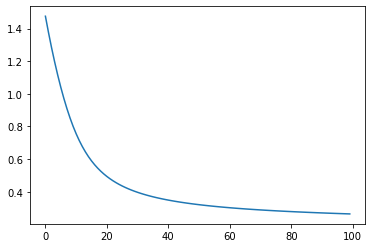

In [64]:
W, b = artificial_neuron(X,y)

In [65]:
W , b

(array([[ 1.25946561],
        [-0.89488744]]),
 array([0.02376021]))

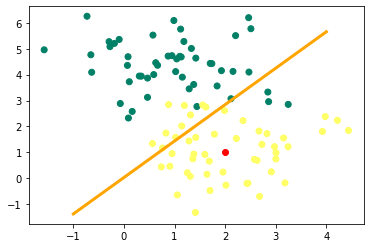

[0.83859403]


array([ True])

In [67]:
new_plant = np.array([2,1])

#frontière de décision
x0 = np.linspace(-1, 4, 100)
x1 = (-W[0] * x0 -b)/W[1]

plt.scatter(X[:,0], X[:,1], c=y, cmap ='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
#afficher la frontière
plt.plot(x0, x1, c="orange", lw=3)

plt.show()
predict(new_plant, W, b)

In [ ]:
#Tracer la frontière de décision (l'ensemble des points pour lesquels Z=0)